<a href="https://colab.research.google.com/github/poliduckie/MPC/blob/main/PutBackground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References
*   Videos from: https://pixabay.com/it/videos/search/room/



## **Setup**

Paths of videos

In [ ]:
# Video of simulation. It's already segmented
pathVideoOfSimulation = '/gdrive/MyDrive/Colab Notebooks/Duckietown/DuckietownData/VideosOfSimulation/1.mp4'

# Videos of room
pathVideosOfRoom = '/gdrive/MyDrive/Colab Notebooks/Duckietown/DuckietownData/VideosForSky'
namesVideoOfRoom = ['1.mp4', '2.mp4', '3,mp4'] #they will be joined to the previous

# Where to save images for training
pathOutput = '/gdrive/MyDrive/Colab Notebooks/Duckietown/DuckietownData/PicturesForTraining'

Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


Import libraries and test presence of videos in Drive

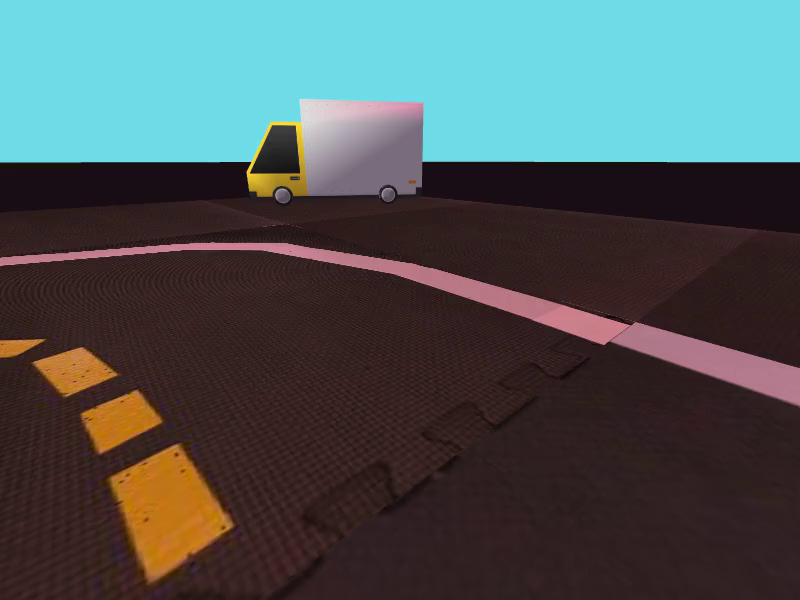

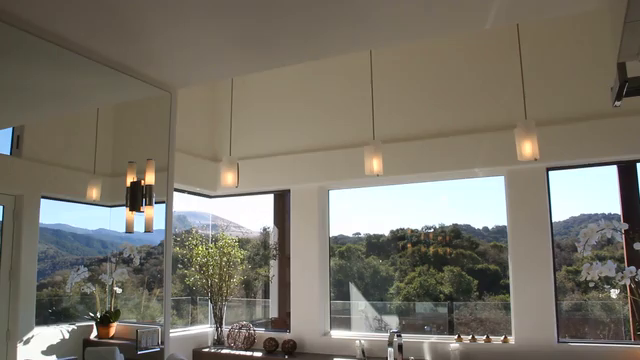

In [ ]:
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow #colab doesn't accept cv2.imshow

videoCapturer = cv2.VideoCapture(pathVideoOfSimulation)
flag, img = videoCapturer.read()
cv2_imshow(img) #colab doesn't accept cv2.imshow

videoCapturer = cv2.VideoCapture(os.path.join(pathVideosOfRoom, namesVideoOfRoom[0]))
flag, img = videoCapturer.read()
cv2_imshow(img) #colab doesn't accept cv2.imshow

## **Add picture to sky**

Set up standard mask for sky

In [ ]:
lowerSkyStandard = np.array([200, 10, 0], dtype="uint8")
upperSkyStandard = np.array([255, 230, 150], dtype="uint8")

In [ ]:
i = 0 #variable for output images names
for video in namesVideoOfRoom: #choose video of the room
    # set up videos
    simulationVideo = cv2.VideoCapture(pathVideoOfSimulation)
    roomVideo = cv2.VideoCapture(os.path.join(pathVideosOfRoom, video))
    flag, simulationFrame = simulationVideo.read()
    flag, roomFrame = roomVideo.read()

    skyMask = cv2.inRange(simulationFrame, lowerSkyStandard, upperSkyStandard)
    xLen = len(skyMask) #will be used later
    yLen = len(skyMask[0])
    xRoomLen = len(roomFrame)
    yRoomLen = len(roomFrame[0])
    while flag != False:
        # set up mask ranges in a slightly random way
        lowerSky = lowerSkyStandard
        upperSky = upperSkyStandard
        for el in lowerSky:
            el += random.randrange(-5, 5)
        for el in upperSky:
            el += random.randrange(-5, 5)

        # create mask of the sky
        skyMask = cv2.inRange(simulationFrame, lowerSky, upperSky)

        # put roomFrame in simulationFrame based on skyMask
        for x in range(0, xLen):
            for y in range(0, yLen):
                if(skyMask[x, y] != 0):
                    simulationFrame[x, y] = roomFrame[x % xRoomLen, y % yRoomLen]

        # save the image
        cv2.imwrite(os.path.join(pathOutput, str(i) + '.jpg'), simulationFrame)
        i += 1
        if i == 2: 
            break
        
        # prepare next frams
        flag, simulationFrame = simulationVideo.read()
        flag, roomFrame = roomVideo.read()

## **Simple case for developing (testing)**

Set up mask

In [ ]:
pathToImage = '/gdrive/MyDrive/Colab Notebooks/Duckietown/DuckietownData/Sky1.jpg'
img = cv2.imread(pathToImage)
lower = np.array([200, 10, 0], dtype="uint8")  # 0, 48, 80
upper = np.array([255, 230, 150], dtype="uint8")  # 20, 255, 255
colorMask = cv2.inRange(img, lower, upper)
cv2_imshow(simulationFrame)
cv2_imshow(colorMask) # => only the sky is white. All the rest is black

Add image into the sky

In [ ]:
pathToImage = '/gdrive/MyDrive/Colab Notebooks/Duckietown/DuckietownData/Prova.jpg'
imgToSky = cv2.imread(pathToImage)

xLen = len(colorMask)
yLen = len(colorMask[0])
for x in range(0, xLen):
    for y in range(0, yLen):
        if(colorMask[x, y] != 0):
            img[x, y] = imgToSky[x, y]

cv2_imshow(img)